## Feature engineering task on Khulna-City  using ML models

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import imblearn


import seaborn as sns # To load the titanic data set too
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # to visualize the Tree
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,Ridge, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
khulna_weather_df=pd.read_csv("../data/khulna_Weather_combined.csv")

print(f'Shape of Khulna city weather dataset is: {khulna_weather_df.shape}')

Shape of Khulna city weather dataset is: (3515, 45)


In [3]:
khulna_weather_df.columns

Index(['datetime', 'Unnamed: 0_x', 'name', 'tempmax_x', 'tempmin_x', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed_x', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'Unnamed: 0.1', 'Unnamed: 0_y', 'river_discharge', 'Unnamed: 0',
       'weathercode', 'tempmax_y', 'tempmin_y', 'temperature_2m_mean',
       'apparent_temperature_mean', 'precipitation_sum', 'rain_sum',
       'precipitation_hours', 'windspeed_y', 'et0_fao_evapotranspiration'],
      dtype='object')

In [4]:
khulna_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3515 entries, 0 to 3514
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   datetime                    3515 non-null   object 
 1   Unnamed: 0_x                3515 non-null   int64  
 2   name                        3515 non-null   object 
 3   tempmax_x                   3515 non-null   float64
 4   tempmin_x                   3515 non-null   float64
 5   temp                        3515 non-null   float64
 6   feelslikemax                3515 non-null   float64
 7   feelslikemin                3515 non-null   float64
 8   feelslike                   3515 non-null   float64
 9   dew                         3515 non-null   float64
 10  humidity                    3515 non-null   float64
 11  precip                      3515 non-null   float64
 12  precipprob                  3515 non-null   float64
 13  precipcover                 3515 

### Data Cleaning

In [5]:
khulna_weather_df.conditions.unique()

array(['Partially cloudy', 'Rain, Partially cloudy', 'Clear', 'Rain',
       'Rain, Overcast', 'Overcast'], dtype=object)

In [6]:
khulna_weather_df.preciptype.unique()

array([nan, 'rain'], dtype=object)

In [7]:
khulna_weather_df.precip.unique()

array([0.000e+00, 9.000e-01, 3.000e-01, 1.000e-01, 1.560e+01, 3.400e+00,
       4.700e+00, 7.500e+00, 6.200e+00, 2.700e+00, 2.240e+01, 1.920e+01,
       1.750e+01, 1.060e+01, 1.330e+01, 4.450e+01, 2.010e+01, 1.790e+01,
       6.700e+00, 1.050e+01, 3.100e+00, 8.000e-01, 2.500e+00, 4.280e+01,
       5.100e+00, 8.200e+00, 1.200e+00, 2.470e+01, 6.900e+00, 9.100e+00,
       4.400e+00, 3.490e+01, 1.700e+00, 3.520e+01, 9.700e+00, 1.370e+01,
       5.300e+00, 1.080e+01, 5.200e+00, 2.110e+01, 3.810e+01, 1.500e+01,
       1.220e+01, 1.340e+01, 1.600e+00, 1.400e+00, 2.100e+00, 2.230e+01,
       1.980e+01, 3.600e+00, 4.000e-01, 1.900e+00, 2.900e+00, 1.800e+01,
       1.000e+00, 1.300e+00, 9.000e+00, 2.800e+00, 9.600e+00, 3.700e+00,
       4.160e+01, 2.990e+01, 1.360e+01, 1.120e+01, 6.800e+00, 3.900e+00,
       2.860e+01, 1.850e+01, 1.100e+01, 5.500e+01, 8.100e+00, 1.150e+01,
       2.400e+00, 2.380e+01, 1.420e+01, 1.230e+01, 5.800e+00, 7.200e+00,
       1.160e+01, 1.280e+01, 2.000e+00, 6.600e+00, 

#### Drop unncessary columns

In [8]:
khulna_weather_df.drop(['Unnamed: 0_x', 'name'], axis=1, inplace=True)

In [9]:
khulna_weather_df.drop(['Unnamed: 0.1', 'Unnamed: 0_y','Unnamed: 0'], axis=1, inplace=True)

In [10]:
khulna_weather_df.weathercode.unique()

array([51, 53,  1,  3,  0, 65, 63, 61, 55,  2], dtype=int64)

In [11]:
khulna_weather_df.rain_sum.unique()

array([1.000e-01, 7.000e+00, 0.000e+00, 6.000e-01, 4.000e-01, 1.600e+00,
       2.640e+01, 7.300e+00, 2.000e-01, 3.000e-01, 6.200e+00, 5.300e+00,
       3.100e+00, 1.160e+01, 5.000e-01, 1.670e+01, 3.400e+00, 1.400e+00,
       3.700e+00, 1.920e+01, 1.400e+01, 8.300e+00, 2.320e+01, 7.600e+00,
       1.300e+00, 2.160e+01, 8.900e+00, 1.010e+01, 6.100e+00, 2.300e+00,
       1.430e+01, 7.900e+00, 6.800e+00, 9.000e-01, 7.400e+00, 5.600e+00,
       1.700e+00, 1.900e+00, 1.310e+01, 8.200e+00, 5.830e+01, 4.100e+00,
       1.890e+01, 2.220e+01, 1.440e+01, 8.600e+00, 2.020e+01, 2.900e+01,
       2.400e+00, 6.900e+00, 8.100e+00, 9.300e+00, 5.000e+00, 5.200e+00,
       1.020e+01, 5.100e+00, 1.500e+00, 2.350e+01, 1.780e+01, 7.000e-01,
       2.800e+00, 8.000e-01, 1.110e+01, 1.000e+00, 3.800e+01, 1.870e+01,
       1.100e+01, 8.800e+00, 1.070e+01, 2.060e+01, 1.800e+00, 8.700e+00,
       1.190e+01, 1.620e+01, 1.050e+01, 1.360e+01, 6.300e+00, 4.400e+00,
       6.400e+00, 2.600e+01, 5.500e+00, 6.700e+00, 

In [12]:
khulna_weather_df.precipitation_sum.unique()

array([1.000e-01, 7.000e+00, 0.000e+00, 6.000e-01, 4.000e-01, 1.600e+00,
       2.640e+01, 7.300e+00, 2.000e-01, 3.000e-01, 6.200e+00, 5.300e+00,
       3.100e+00, 1.160e+01, 5.000e-01, 1.670e+01, 3.400e+00, 1.400e+00,
       3.700e+00, 1.920e+01, 1.400e+01, 8.300e+00, 2.320e+01, 7.600e+00,
       1.300e+00, 2.160e+01, 8.900e+00, 1.010e+01, 6.100e+00, 2.300e+00,
       1.430e+01, 7.900e+00, 6.800e+00, 9.000e-01, 7.400e+00, 5.600e+00,
       1.700e+00, 1.900e+00, 1.310e+01, 8.200e+00, 5.830e+01, 4.100e+00,
       1.890e+01, 2.220e+01, 1.440e+01, 8.600e+00, 2.020e+01, 2.900e+01,
       2.400e+00, 6.900e+00, 8.100e+00, 9.300e+00, 5.000e+00, 5.200e+00,
       1.020e+01, 5.100e+00, 1.500e+00, 2.350e+01, 1.780e+01, 7.000e-01,
       2.800e+00, 8.000e-01, 1.110e+01, 1.000e+00, 3.800e+01, 1.870e+01,
       1.100e+01, 8.800e+00, 1.070e+01, 2.060e+01, 1.800e+00, 8.700e+00,
       1.190e+01, 1.620e+01, 1.050e+01, 1.360e+01, 6.300e+00, 4.400e+00,
       6.400e+00, 2.600e+01, 5.500e+00, 6.700e+00, 

Column precipitation_sum and rain_sum both have same values drop rain_sum column

In [13]:
khulna_weather_df.drop('rain_sum', axis=1, inplace=True)

In [14]:
khulna_weather_df.describe()

,tempmax_x,tempmin_x,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,river_discharge,weathercode,tempmax_y,tempmin_y,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,...,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.00000
mean,32.233883,21.498748,26.139943,36.530469,21.972859,28.685377,20.062105,73.489900,5.926828,51.266003,...,122.692205,31.846373,30.098834,21.982105,25.740910,29.337354,4.190896,4.873400,13.036984,3.70173
std,4.175609,5.475456,4.428450,7.276642,6.269834,6.632190,6.394693,14.319106,13.593381,49.991081,...,112.260075,28.257481,3.537632,4.974559,3.922779,6.038513,8.640110,6.459996,4.935106,1.15191
min,17.600000,6.200000,13.100000,17.600000,4.100000,12.700000,-1.100000,22.900000,0.000000,0.000000,...,0.310000,0.000000,19.700000,9.200000,15.100000,13.500000,0.000000,0.000000,4.100000,0.48000
25%,29.500000,17.350000,23.050000,29.800000,17.350000,23.000000,15.300000,64.200000,0.000000,0.000000,...,29.095000,1.000000,27.600000,17.700000,22.800000,24.500000,0.000000,0.000000,9.400000,3.02000
50%,32.200000,23.600000,27.800000,37.700000,23.600000,30.100000,22.100000,75.300000,0.100000,100.000000,...,95.160000,51.000000,30.600000,24.100000,27.100000,31.600000,0.300000,1.000000,11.900000,3.59000
75%,35.100000,26.100000,29.200000,42.400000,26.100000,34.200000,25.800000,85.500000,6.400000,100.000000,...,187.580000,61.000000,32.500000,26.000000,28.700000,34.100000,4.800000,9.000000,15.700000,4.42000
max,43.400000,29.800000,34.400000,61.600000,37.900000,42.700000,27.800000,96.400000,209.600000,100.000000,...,742.020000,65.000000,39.400000,29.600000,33.100000,39.800000,126.900000,24.000000,51.900000,7.15000


river_discharge
0.53      0.023044
0.44      0.022760
0.47      0.021906
0.50      0.018492
0.41      0.017070
            ...   
14.89     0.000284
19.80     0.000284
6.41      0.000284
344.94    0.000284
446.71    0.000284
Name: count, Length: 1236, dtype: float64


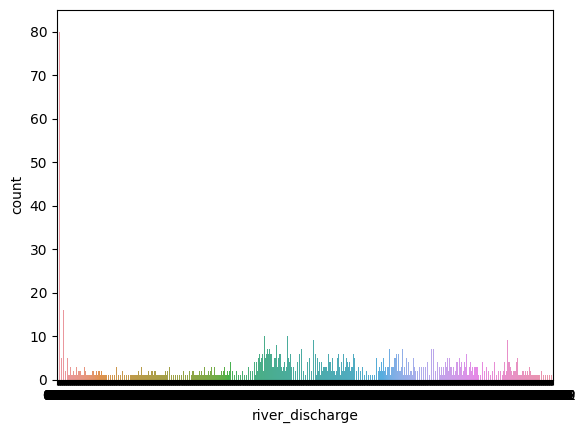

In [15]:
print(khulna_weather_df['river_discharge'].value_counts()/len(khulna_weather_df))
sns.countplot(x='river_discharge', data=khulna_weather_df)
plt.show()

conditions
Rain, Partially cloudy    0.393457
Clear                     0.267425
Partially cloudy          0.217923
Rain, Overcast            0.079374
Rain                      0.039829
Overcast                  0.001991
Name: count, dtype: float64


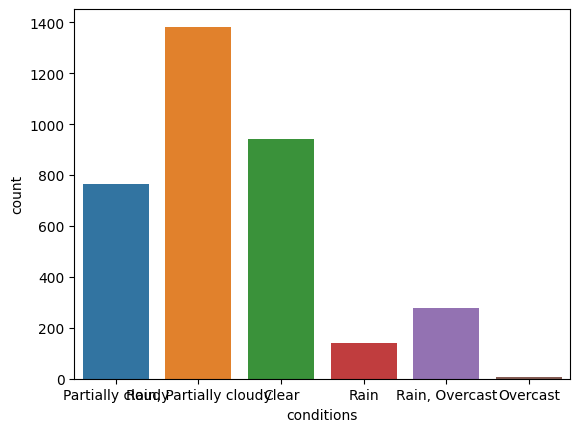

In [16]:
print(khulna_weather_df['conditions'].value_counts()/len(khulna_weather_df))
sns.countplot(x='conditions', data=khulna_weather_df)
plt.show()

#### Data Preprocessing

Before training the model, we need to preprocess the data. This includes handling missing values, converting categorical data into numerical data, and splitting the data into training and testing sets.

### 1. Handling missing values

In [17]:
khulna_weather_df.isnull().sum().sort_values(ascending=False)/len(khulna_weather_df)*100

severerisk                    83.357041
snow                          83.357041
snowdepth                     83.300142
windgust                      82.702703
preciptype                    48.648649
visibility                    17.126600
sealevelpressure              17.098151
uvindex                        0.000000
sunrise                        0.000000
sunset                         0.000000
moonphase                      0.000000
datetime                       0.000000
river_discharge                0.000000
weathercode                    0.000000
tempmax_y                      0.000000
tempmin_y                      0.000000
temperature_2m_mean            0.000000
apparent_temperature_mean      0.000000
precipitation_sum              0.000000
precipitation_hours            0.000000
windspeed_y                    0.000000
conditions                     0.000000
cloudcover                     0.000000
solarenergy                    0.000000
solarradiation                 0.000000


We'll delete the severerisk','snow','snowdepth','windgust' column because it accounts for 84% of missing values. This column doesn't provide much information about our passenger.

We will then remove the remaining missing values in the dataset..

In [18]:
# Dropping the column deck
khulna_weather_df= khulna_weather_df.drop(['severerisk','snow','snowdepth','windgust'], axis = 1)
# Check
khulna_weather_df.isnull().sum().sort_values(ascending=False)/len(khulna_weather_df)*100

preciptype                    48.648649
visibility                    17.126600
sealevelpressure              17.098151
solarenergy                    0.000000
sunrise                        0.000000
sunset                         0.000000
moonphase                      0.000000
conditions                     0.000000
river_discharge                0.000000
weathercode                    0.000000
tempmax_y                      0.000000
tempmin_y                      0.000000
temperature_2m_mean            0.000000
apparent_temperature_mean      0.000000
precipitation_sum              0.000000
precipitation_hours            0.000000
windspeed_y                    0.000000
uvindex                        0.000000
datetime                       0.000000
solarradiation                 0.000000
tempmax_x                      0.000000
cloudcover                     0.000000
winddir                        0.000000
windspeed_x                    0.000000
precipcover                    0.000000


In [19]:
# Drope the remaning missing value 
khulna_weather_df= khulna_weather_df.dropna()
# Check
khulna_weather_df.isnull().sum().sort_values(ascending=False)/len(khulna_weather_df)*100

datetime                      0.0
weathercode                   0.0
uvindex                       0.0
sunrise                       0.0
sunset                        0.0
moonphase                     0.0
conditions                    0.0
river_discharge               0.0
tempmax_y                     0.0
solarradiation                0.0
tempmin_y                     0.0
temperature_2m_mean           0.0
apparent_temperature_mean     0.0
precipitation_sum             0.0
precipitation_hours           0.0
windspeed_y                   0.0
solarenergy                   0.0
visibility                    0.0
tempmax_x                     0.0
humidity                      0.0
tempmin_x                     0.0
temp                          0.0
feelslikemax                  0.0
feelslikemin                  0.0
feelslike                     0.0
dew                           0.0
precip                        0.0
cloudcover                    0.0
precipprob                    0.0
precipcover   

### Target distribution

#### Feature Selection


In [20]:
# Correct the date format and delimiter in pd.to_datetime
khulna_weather_df['datetime'] = pd.to_datetime(khulna_weather_df['datetime'], format="%d-%m-%Y")

# Extract the year
khulna_weather_df['year'] = khulna_weather_df['datetime'].dt.year

# Extract month
khulna_weather_df['month'] = khulna_weather_df['datetime'].dt.month

In [21]:
khulna_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1527 entries, 1 to 3507
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   datetime                    1527 non-null   datetime64[ns]
 1   tempmax_x                   1527 non-null   float64       
 2   tempmin_x                   1527 non-null   float64       
 3   temp                        1527 non-null   float64       
 4   feelslikemax                1527 non-null   float64       
 5   feelslikemin                1527 non-null   float64       
 6   feelslike                   1527 non-null   float64       
 7   dew                         1527 non-null   float64       
 8   humidity                    1527 non-null   float64       
 9   precip                      1527 non-null   float64       
 10  precipprob                  1527 non-null   float64       
 11  precipcover                 1527 non-null   float64       
 1

In [22]:
khulna_weather_df=khulna_weather_df.drop( ['datetime'],axis=1)

In [23]:
khulna_weather_df.columns

Index(['tempmax_x', 'tempmin_x', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'windspeed_x', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunset', 'moonphase', 'conditions', 'river_discharge',
       'weathercode', 'tempmax_y', 'tempmin_y', 'temperature_2m_mean',
       'apparent_temperature_mean', 'precipitation_sum', 'precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration', 'year', 'month'],
      dtype='object')

In [24]:
khulna_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1527 entries, 1 to 3507
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tempmax_x                   1527 non-null   float64
 1   tempmin_x                   1527 non-null   float64
 2   temp                        1527 non-null   float64
 3   feelslikemax                1527 non-null   float64
 4   feelslikemin                1527 non-null   float64
 5   feelslike                   1527 non-null   float64
 6   dew                         1527 non-null   float64
 7   humidity                    1527 non-null   float64
 8   precip                      1527 non-null   float64
 9   precipprob                  1527 non-null   float64
 10  precipcover                 1527 non-null   float64
 11  preciptype                  1527 non-null   object 
 12  windspeed_x                 1527 non-null   float64
 13  winddir                     1527 non-n

### Feature Selection

In [27]:
X = khulna_weather_df[['year', 'tempmax_x', 'tempmin_x', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precipprob','preciptype',
       'precipcover', 'windspeed_x', 'winddir',  'precip',   
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'sunrise', 'sunset', 'moonphase',
       'conditions', 'river_discharge', 'weathercode', 'tempmax_y',
       'tempmin_y', 'temperature_2m_mean', 'apparent_temperature_mean',
       'precipitation_sum', 'precipitation_hours', 'windspeed_y',
       'et0_fao_evapotranspiration', 'month']] 

y = khulna_weather_df['precipitation_sum']

In [28]:
X.head()

,year,tempmax_x,tempmin_x,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precipprob,...,weathercode,tempmax_y,tempmin_y,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration,month
1,2015,28.9,17.5,21.2,28.8,17.5,21.2,16.5,76.7,100.0,...,53,21.7,18.3,20.1,22.0,7.0,13.0,10.8,0.82,1
24,2016,33.3,20.4,26.0,33.4,20.4,26.2,18.0,65.2,100.0,...,1,30.2,21.1,25.6,28.8,0.0,0.0,9.0,3.94,3
25,2016,33.3,20.4,26.0,33.4,20.4,26.2,18.0,65.2,100.0,...,1,30.2,21.1,25.6,28.8,0.0,0.0,9.0,3.94,3
34,2015,35.8,22.6,28.5,38.5,22.6,30.0,21.6,70.3,100.0,...,51,31.1,24.0,27.4,31.1,1.6,5.0,20.9,4.28,4
35,2016,33.2,19.0,26.6,35.8,19.0,27.7,22.2,79.5,100.0,...,65,27.1,21.6,24.7,28.5,26.4,12.0,18.5,1.91,4


In [ ]:
X = pd.get_dummies(X, columns=['year', 'tempmax_x', 'tempmin_x', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precipprob',
       'precipcover', 'preciptype', 'windspeed_x', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'sunrise', 'sunset', 'moonphase',
       'conditions', 'river_discharge', 'weathercode', 'tempmax_y',
       'tempmin_y', 'temperature_2m_mean', 'apparent_temperature_mean',
       'precipitation_sum', 'precipitation_hours', 'windspeed_y',
       'et0_fao_evapotranspiration', 'month'], drop_first = True, dtype = int)
# Check
X.head()

#### Split the data into training and testing sets


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Model Training

In [30]:
# Initialize the model
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model
dt_clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'rain'

## 4. Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
# Make predictions
y_pred_dt = dt_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy}')

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print(f'Confusion Matrix:\n{cm}')

In [ ]:
Accuracy = (195+2)/(195+2+1+2)
Accuracy

Here, we're making predictions on our testing set and calculating the accuracy of those predictions. The accuracy score is the proportion of correct predictions made by the model. The confusion matrix shows the breakdown of true positives, true negatives, false positives, and false negatives.

In [ ]:
print(classification_report(y_test, y_pred_dt))

In [ ]:
precision_class0 = 195/(195+1)
precision_class0

In [ ]:
precision_class1 = 2/(2+2)
precision_class1

In [ ]:
Recall=2/(2+1)
Recall

99% Model perdicts correct precipitation of no rain

In [ ]:
y_pred_dt = dt_clf.predict(X_test)
y_pred_dt

In [ ]:
y_pred_proba_dt = dt_clf.predict_proba(X_test)[:,1]
y_pred_proba_dt

In [ ]:
# Get the model's probability predictions for the positive class
y_pred_proba_dt = dt_clf.predict_proba(X_test)[::,1]

# Compute the ROC curve
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_proba_dt)

# Calculate AUC
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

In [ ]:
# Plot the decision tree
plt.figure(figsize=(15,15))
plot_tree(dt_clf, feature_names=X.columns, class_names=['0','1'], filled=True)
plt.show()

In [ ]:
# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix:\n{cm}')

In [ ]:
print(classification_report(y_test, y_pred_rf))

In [ ]:
# Get the model's probability predictions for the positive class
y_pred_proba_rf = rf_clf.predict_proba(X_test)[::,1]

# Compute the ROC curve
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_proba_rf)

# Calculate AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

In [ ]:
# Decision Tree
plt.plot(fpr_dt,tpr_dt,label="Decision Tree, auc="+str(roc_auc_dt))

# Random Forest
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc="+str(roc_auc_rf))

plt.legend(loc=4)
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Handling Imbalanced Data
In classification problems, it's common to have imbalanced classes, i.e., one class has significantly more samples than the other. This can lead to poor performance for the minority class. Techniques to handle imbalanced data include:

Oversampling: This involves increasing the number of instances in the minority class by randomly replicating them in order to present a higher representation.

Undersampling: This refers to reducing the data of the majority class, bringing balance to the dataset.

SMOTE (Synthetic Minority Over-sampling Technique): This is a combination of oversampling and undersampling, but the oversampling approach is not by replicating minority class but constructing new minority class data instance via an algorithm.

Note: these techniques don't always improve results. It's essential to validate performance with a hold-out test set to ensure the tuning steps have improved your model.

In [ ]:
# Create a binary classification dataset with imbalanced class distribution
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the over-sampled data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_sm, y_sm)

# Evaluate the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply under-sampling to the training data
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_us, y_us = undersampler.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the under-sampled data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_us, y_us)

# Evaluate the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))